## Imports ##

In [1]:
from tqdm import tqdm
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

## Load MNIST ##

In [2]:
mndata = MNIST('data')
x_train_data, y_train_data = mndata.load_training()
x_test_data, y_test_data = mndata.load_testing()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device:", device)

device: cuda


## Build Noisy MNIST Environment ##

In [3]:
from noisy_mnist_aleatoric_uncertainty_for_poster import NoisyMnistEnv
mnist_env_train = NoisyMnistEnv("train", 0, 2)
mnist_env_test_zeros = NoisyMnistEnv("test", 0, 1)
mnist_env_test_ones = NoisyMnistEnv("test", 1, 2)

device: cuda:1


## Define Experiments ##

In [12]:
repeats = 3
training_steps=500
checkpoint_loss=10
mse_lr = 0.001 
aleatoric_lr = 0.001

from noisy_mnist_aleatoric_uncertainty_for_poster import Net, NoisyMNISTExperimentRun, AleatoricNet, NoisyMNISTExperimentRunAMA
mse_model = Net()
experiment_mse = NoisyMNISTExperimentRun(
    repeats=repeats,
    training_steps=training_steps,
    checkpoint_loss=checkpoint_loss,
    lr=mse_lr,
    model=mse_model,
    mnist_env_train=mnist_env_train,
    mnist_env_test_zeros=mnist_env_test_zeros,
    mnist_env_test_ones=mnist_env_test_ones,
    device=device,
)
aleatoric_model = AleatoricNet()
experiment_AMA = NoisyMNISTExperimentRunAMA(
    repeats=repeats,
    training_steps=training_steps,
    checkpoint_loss=checkpoint_loss,
    lr=aleatoric_lr,
    model=aleatoric_model,
    mnist_env_train=mnist_env_train,
    mnist_env_test_zeros=mnist_env_test_zeros,
    mnist_env_test_ones=mnist_env_test_ones,
    device=device,
)

In [6]:
experiment_mse.run_experiment()

100%|██████████| 500/500 [00:04<00:00, 102.90it/s]


In [7]:
experiment_AMA.run_experiment()

100%|██████████| 500/500 [00:05<00:00, 94.33it/s]


## Qualitative Plots ##

ValueError: cannot reshape array of size 25088 into shape (28,28)

<Figure size 16000x12000 with 0 Axes>

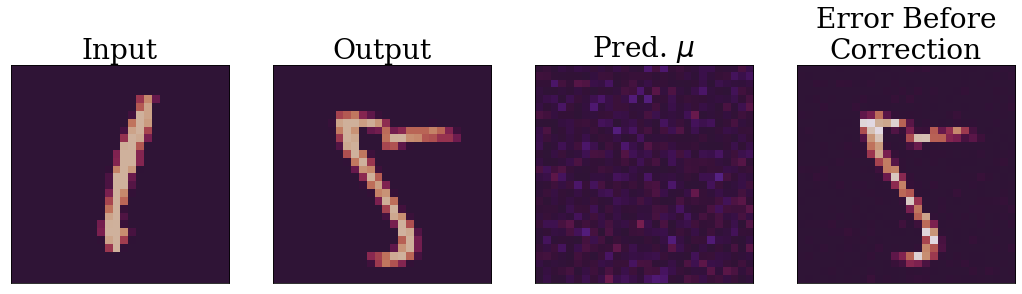

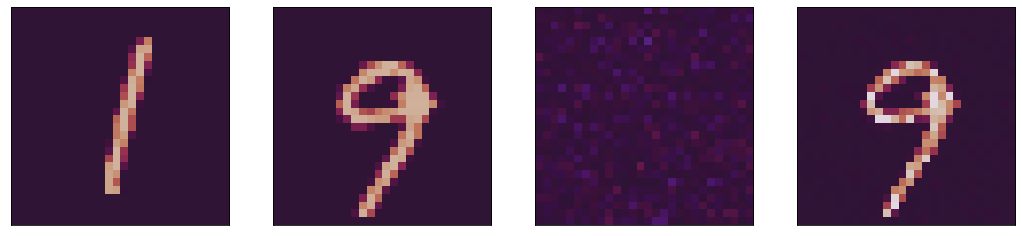

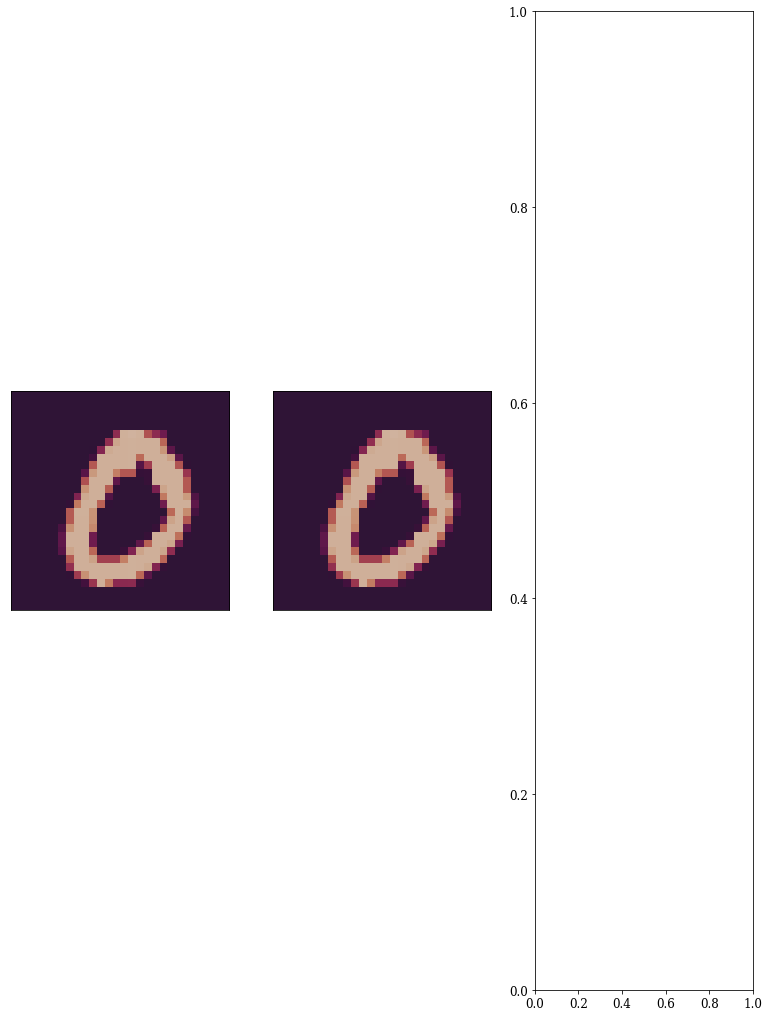

In [18]:
data, target = mnist_env_test_ones.step()
mu = mse_model(torch.from_numpy(data).float().to(device)/255)


from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
title_size = 28
cmap='twilight'
lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 4
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Error Before\nCorrection", fontsize=title_size)

    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    #plt.show()
    
data, target = mnist_env_test_zeros.step()
mu = model(torch.from_numpy(data).float().to(device)/255)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
# title_size = 12
# cmap='twilight'
# lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 4
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("Pred. $\mu$", fontsize=title_size)
#         plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("MSE Error", fontsize=title_size)
#     if i == 0:
#         plt.title("AMA Error", fontsize=title_size)
    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    plt.show()

<Figure size 16000x12000 with 0 Axes>

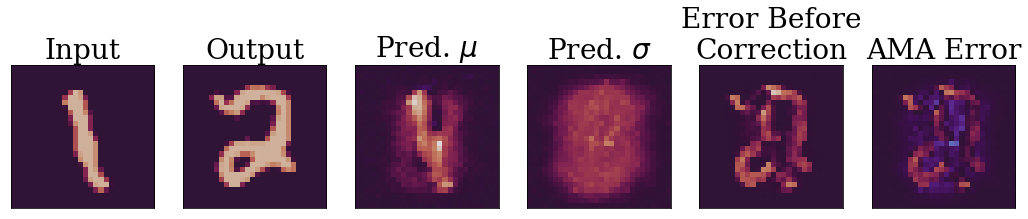

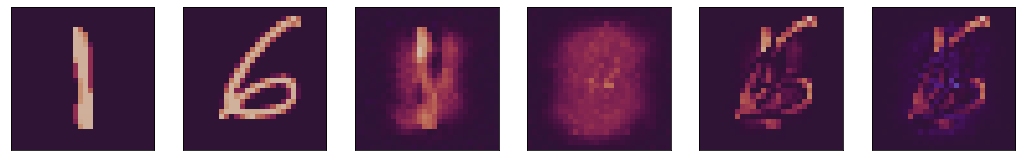

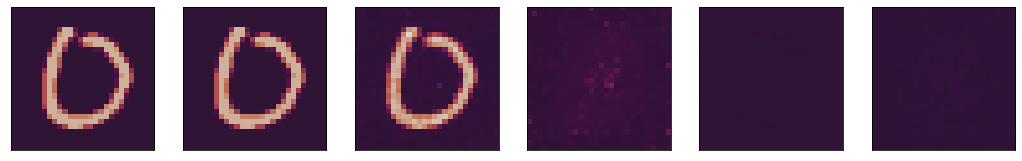

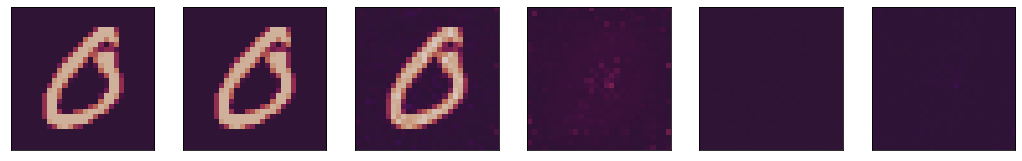

In [10]:
data, target = mnist_env_test_ones.step()
mu, sigma = model(torch.from_numpy(data).float().to(device)/255)


from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
title_size = 28
cmap='twilight'
lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 6
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 5)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Error Before\nCorrection", fontsize=title_size)

    fig.add_subplot(rows, columns, 6)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28) 
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    avg_error = np.mean(error)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("AMA Error", fontsize=title_size)
    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    #plt.show()
    
data, target = mnist_env_test_zeros.step()
mu, sigma = model(torch.from_numpy(data).float().to(device)/255)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
# title_size = 12
# cmap='twilight'
# lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 6
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 5)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("MSE Error", fontsize=title_size)

    fig.add_subplot(rows, columns, 6)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28) 
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    avg_error = np.mean(error)
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("AMA Error", fontsize=title_size)
    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    plt.show()

## Arxiv Plots ##

['aleatoric_loss_list_stochastic_repeat_0.npy', 'loss_list_stochastic_repeat_0.npy', 'aleatoric_loss_list_stochastic_repeat_1.npy', 'loss_list_stochastic_repeat_2.npy', 'loss_list_deterministic_repeat_2.npy', 'loss_list_deterministic_repeat_1.npy', 'aleatoric_loss_list_deterministic_repeat_1.npy', 'loss_list_deterministic_repeat_0.npy', 'aleatoric_loss_list_deterministic_repeat_2.npy', 'loss_list_stochastic_repeat_1.npy', 'aleatoric_loss_list_deterministic_repeat_0.npy', 'aleatoric_loss_list_stochastic_repeat_2.npy']
['loss_list_stochastic_repeat_0.npy', 'loss_list_stochastic_repeat_2.npy', 'loss_list_stochastic_repeat_1.npy']
['loss_list_deterministic_repeat_2.npy', 'loss_list_deterministic_repeat_1.npy', 'loss_list_deterministic_repeat_0.npy']
['aleatoric_loss_list_stochastic_repeat_0.npy', 'aleatoric_loss_list_stochastic_repeat_1.npy', 'aleatoric_loss_list_stochastic_repeat_2.npy']
['aleatoric_loss_list_deterministic_repeat_1.npy', 'aleatoric_loss_list_deterministic_repeat_2.npy', '

Text(0.5, 1.0, 'Noisy MNIST')

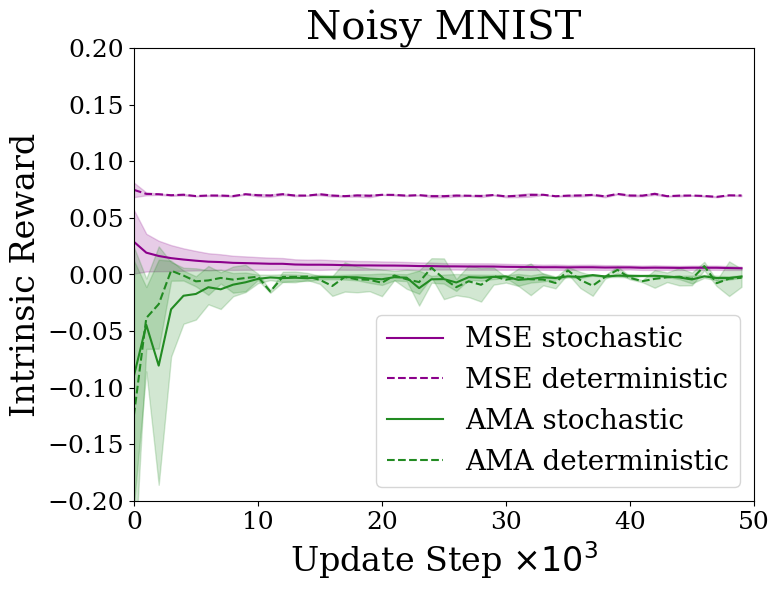

In [9]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
from matplotlib import rcParams
rcParams['axes.titlepad'] =2 

def load_files_into_arr(list_of_file_paths):
    all_arrs = []
    for a_file in list_of_file_paths:
        all_arrs.append(np.load(a_file))
    return all_arrs

def get_mean_and_std_dev(arr_of_results):
    return np.mean(arr_of_results, axis=0), np.std(arr_of_results, axis=0)

def plot_mean_and_std(mean, std, label):
    assert len(mean) == len(std)
    if "stochastic" in label:
        linestyle="-"
    else:
        linestyle="--"
    if "AMA" in label:
        color="forestgreen"
    else:
        color="darkmagenta"
    plt.plot(list(range(len(mean))), mean, linestyle=linestyle, label=label, color=color)
    x = list(range(len(mean)))
    plt.fill_between(x, (mean-std), (mean+std), alpha=0.2, color=color)

import glob
npy_files = glob.glob("*npy")
print(npy_files)
aleatoric_stochastic = [file for file in npy_files if "stochastic" in file and "aleatoric" in file]
aleatoric_deterministic = [file for file in npy_files if "deterministic" in file and "aleatoric" in file]
vanilla_deterministic = [file for file in npy_files if "aleatoric" not in file and "deterministic" in file]
vanilla_stochastic = [file for file in npy_files if "aleatoric" not in file and "stochastic" in file]

list_of_file_lists =[vanilla_stochastic, vanilla_deterministic, aleatoric_stochastic, aleatoric_deterministic]

print(vanilla_stochastic)
print(vanilla_deterministic)
print(aleatoric_stochastic)
print(aleatoric_deterministic)

legends = [r"MSE stochastic",
           r"MSE deterministic",
           r"AMA stochastic",
           r"AMA deterministic"]

colors = ["darkmagenta", "forestgreen"]
plt.xlim(0, 50)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

for i, files in enumerate(list_of_file_lists):
    results = load_files_into_arr(files)
    mu, sigma = get_mean_and_std_dev(results)
    plot_mean_and_std(mu, sigma, legends[i])

plt.rc('font', family='serif')
plt.legend(loc="best", fontsize=20)
plt.ylabel("Intrinsic Reward", fontsize=24)
plt.xlabel(r"Update Step $\times 10 ^{3}$", fontsize=24)
plt.ylim(-0.2,0.2)
plt.title("Noisy MNIST", fontsize=29)